In [1]:
import math
import pprint
import matplotlib
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
%matplotlib inline

pp = pprint.PrettyPrinter()

In [2]:
def readfile(filename):
    with open(filename) as f:
        lines = f.readlines()
    return lines

In [3]:
matplotlib.rcParams['figure.figsize'] = [16, 8]

def plot_current(datalist):
    
    algo_coll = []
    algo_dist = []
    algo_rtm = []
    algo_hyb = []
    xticks = []
    
    for nmmote in datalist.keys():
        xticks.append(nmmote + ' motes')
        for algo in datalist[nmmote]:
#             print nmmote, algo, datalist[nmmote][algo]
#             darr = np.max(np.array([tup[1][0] for tup in datalist[nmmote][algo]])) # min
#             darr = np.max(np.array([tup[1][1] for tup in datalist[nmmote][algo]])) # max
            darr = np.max(np.array([tup[1][2] for tup in datalist[nmmote][algo]])) # sum
            if (algo.find('Distance') != -1):
                algo_dist.append(darr)
            elif (algo.find('Metric') != -1):
                algo_rtm.append(darr)
            elif (algo.find('Collect') != -1):
                algo_coll.append(darr)
            elif (algo.find('Hybrid') != -1):
                algo_hyb.append(darr)
            print xticks, algo_dist
    
    xticks = list(set(xticks))
    print algo_coll, algo_dist, algo_rtm, algo_hyb, xticks
    
    barWidth = 0.2

    # Set position of bar on X axis
    r1 = np.arange(len(algo_dist))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    
#     print algo_coll, algo_dist, algo_rtm, algo_hyb

    # Make the plot
    plt.bar(r1, algo_coll, color='#F03434', width=barWidth, edgecolor='white', label='Collect')
    plt.bar(r2, algo_dist, color='#F9BF3B', width=barWidth, edgecolor='white', label='Distance')
    plt.bar(r3, algo_rtm, color='#4183D7', width=barWidth, edgecolor='white', label='RTMetric')
    plt.bar(r4, algo_hyb, color='#00E640', width=barWidth, edgecolor='white', label='Hybrid')

    # Add xticks on the middle of the group bars
    plt.xlabel('Number of motes', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(algo_dist))], xticks)
    plt.ylim([min(algo_dist) - 5, max(algo_dist) + 5])
#     plt.ylim([min([min(algo_coll), min(algo_dist), min(algo_rtm), min(algo_hyb)]) - 0.0002,
#                  max([max(algo_coll), max(algo_dist), max(algo_rtm), max(algo_hyb)]) + 0.0002])
#     plt.ylim([min([min(algo_coll), min(algo_dist), min(algo_rtm), min(algo_hyb)]) - 0.15,
#               max([max(algo_coll), max(algo_dist), max(algo_rtm), max(algo_hyb)]) + 0.15])
#     plt.ylim([.043, .045])

    # Create legend & Show graphic
    plt.title('Maximum Current Consumption')
    plt.ylabel('Current Consumption')
    plt.legend()
    plt.show()

    
#     current_sum = {}
    
#     for k in datalist.keys():
#         x = np.arange(len(datalist[k]))
#         xticks = np.array([t[0][3:-4] for t in datalist[k]])
#         y = np.array([t[1][0] for t in datalist[k]])    # t[1][0] for min; t[1][1] for max; t[1][2] for sum
#         print y
#         current_sum[k] = min(y)

#     xticks = np.array([t[14:-13] for t in datalist.keys()])
#     print xticks
#     x = current_sum.keys()
#     y = current_sum.values()
    
#     # Bar Chart
#     print y
#     plt.ylim([.04075, .04290])
#     plt.xlabel('Parameters')
#     plt.ylabel('Total Current Consumption')
#     plt.bar(xticks - 0.2, y, color='r')
#     plt.bar(xticks, y, color='g')
#     plt.bar(xticks + 0.2, y, color='b')
#     plt.grid(b=True)
#     plt.show()

In [4]:
def get_current(lines):
    lines = lines[100:]
    current = [float(l.split('\t')[7]) for l in lines]
    return (min(current), max(current), sum(current))

def get_dirs(folder):
    return glob(folder)

def chart(folders):
    datalist = {}
    for folder in folders:
        folderpaths = get_dirs(folder)
        
        nmotes = folder[11:13]
        datalist[nmotes] = {}
        
        for path in folderpaths:
            path = path + 'consumption/'
#             print path
            allfiles = [f for f in listdir(path) if isfile(join(path, f))]
            allfiles = [f for f in allfiles if f.find('oml') != -1]
            allfiles.sort()
            
            
            algo = path[path.find('/', 11) + 1:path.find('/', 16)]
            
            datalist[nmotes][algo] = []
            
#             print nmmotes, datalist

            for onefile in allfiles:
                lines = readfile(path + onefile)
                lines = lines[9:]

                mpower = get_current(lines)
                datalist[nmotes][algo].append((onefile, mpower))

#     pp.pprint(datalist)
    plot_current(datalist)

In [7]:
def lastplot():
    
    algo_coll = []
    algo_dist = []
    algo_rtm = []
    algo_hyb = []
    
    a1 = [6.81696,7.85844,8.61588,7.66908,7.95312]
    a2 = [a / 2 for a in a1]
    xticks = ['1', '2', '3', '4', '5']
    
#     for nmmote in datalist.keys():
#         xticks.append(nmmote + ' motes')
#         for algo in datalist[nmmote]:
# #             print nmmote, algo, datalist[nmmote][algo]
# #             darr = np.max(np.array([tup[1][0] for tup in datalist[nmmote][algo]])) # min
# #             darr = np.max(np.array([tup[1][1] for tup in datalist[nmmote][algo]])) # max
#             darr = np.max(np.array([tup[1][2] for tup in datalist[nmmote][algo]])) # sum
#             if (algo.find('Distance') != -1):
#                 algo_dist.append(darr)
#             elif (algo.find('Metric') != -1):
#                 algo_rtm.append(darr)
#             elif (algo.find('Collect') != -1):
#                 algo_coll.append(darr)
#             elif (algo.find('Hybrid') != -1):
#                 algo_hyb.append(darr)
#             print xticks, algo_dist
    
#     xticks = list(set(xticks))
    print a1, a2, xticks
    
    barWidth = 0.2

    # Set position of bar on X axis
    r1 = np.arange(len(a1))
    r2 = [x + barWidth for x in a1]
    
#     print algo_coll, algo_dist, algo_rtm, algo_hyb

    # Make the plot
    plt.bar(r1, algo_coll, color='#F03434', width=barWidth, edgecolor='white', label='Collect')
    plt.bar(r2, algo_dist, color='#F9BF3B', width=barWidth, edgecolor='white', label='Distance')
    plt.bar(r3, algo_rtm, color='#4183D7', width=barWidth, edgecolor='white', label='RTMetric')
    plt.bar(r4, algo_hyb, color='#00E640', width=barWidth, edgecolor='white', label='Hybrid')

    # Add xticks on the middle of the group bars
    plt.xlabel('Number of motes', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(algo_dist))], xticks)
    plt.ylim([min(algo_dist) - 5, max(algo_dist) + 5])
#     plt.ylim([min([min(algo_coll), min(algo_dist), min(algo_rtm), min(algo_hyb)]) - 0.0002,
#                  max([max(algo_coll), max(algo_dist), max(algo_rtm), max(algo_hyb)]) + 0.0002])
#     plt.ylim([min([min(algo_coll), min(algo_dist), min(algo_rtm), min(algo_hyb)]) - 0.15,
#               max([max(algo_coll), max(algo_dist), max(algo_rtm), max(algo_hyb)]) + 0.15])
#     plt.ylim([.043, .045])

    # Create legend & Show graphic
    plt.title('Maximum Current Consumption')
    plt.ylabel('Current Consumption')
    plt.legend()
    plt.show()

[6.81696, 7.85844, 8.61588, 7.66908, 7.95312] [3.40848, 3.92922, 4.30794, 3.83454, 3.97656] ['1', '2', '3', '4', '5']


ValueError: min() arg is an empty sequence

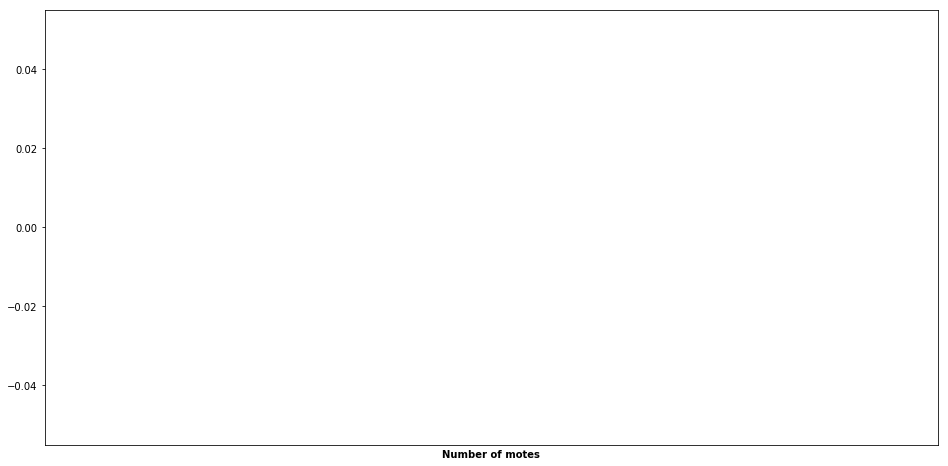

In [8]:
if __name__ == "__main__":
    lastplot()
#     folders = ['power_logs/30/*/', 'power_logs/50/*/']
#     chart(folders)
    savefig('fig.png')